In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta


In [21]:
def posix_time(dt):
    return (dt - datetime(1970, 1, 1)) / timedelta(seconds=1)


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
data = pd.read_csv('/content/drive/MyDrive/Train.csv')

In [24]:
data = data.sort_values(
    by=['date_time'], ascending=True).reset_index(drop=True)
last_n_hours = [1, 2, 3, 4, 5, 6]
for n in last_n_hours:
    data[f'last_{n}_hour_traffic'] = data['traffic_volume'].shift(n)
data = data.dropna().reset_index(drop=True)
data.loc[data['is_holiday'] != 'None', 'is_holiday'] = 1
data.loc[data['is_holiday'] == 'None', 'is_holiday'] = 0
data['is_holiday'] = data['is_holiday'].astype(int)

data['date_time'] = pd.to_datetime(data['date_time'])
data['hour'] = data['date_time'].map(lambda x: int(x.strftime("%H")))
data['month_day'] = data['date_time'].map(lambda x: int(x.strftime("%d")))
data['weekday'] = data['date_time'].map(lambda x: x.weekday()+1)
data['month'] = data['date_time'].map(lambda x: int(x.strftime("%m")))
data['year'] = data['date_time'].map(lambda x: int(x.strftime("%Y")))
data.to_csv("traffic_volume_data.csv", index=None)


In [25]:
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
data = pd.read_csv("traffic_volume_data.csv")
data = data.sample(10000).reset_index(drop=True)
label_columns = ['weather_type', 'weather_description']
numeric_columns = ['is_holiday', 'temperature',
                       'weekday', 'hour', 'month_day', 'year', 'month']

In [26]:
features = numeric_columns+label_columns
X = data[features]
X.head()

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,0,291.28,2,1,6,2014,5,Clouds,overcast clouds
1,0,271.81,2,8,22,2015,12,Mist,mist
2,0,293.12,4,14,16,2015,7,Rain,moderate rain
3,0,280.08,5,1,11,2015,12,Snow,light snow
4,0,281.93,1,8,14,2016,3,Fog,fog


In [27]:
X.shape


(10000, 9)

In [28]:
from functools import reduce
def unique(list1):
    ans = reduce(lambda re, x: re+[x] if x not in re else re, list1, [])
    print(ans)

n1 = data['weather_type']
n2 = data['weather_description']
unique(n1)
unique(n2)
n1features = ['Rain', 'Clouds', 'Clear', 'Snow', 'Mist',
              'Drizzle', 'Haze', 'Thunderstorm', 'Fog', 'Smoke', 'Squall']
n2features = ['light rain', 'few clouds', 'Sky is Clear', 'light snow', 'sky is clear', 'mist', 'broken clouds', 'moderate rain', 'drizzle', 'overcast clouds', 'scattered clouds', 'haze', 'proximity thunderstorm', 'light intensity drizzle', 'heavy snow', 'heavy intensity rain', 'fog', 'heavy intensity drizzle', 'shower snow', 'snow', 'thunderstorm with rain',
              'thunderstorm with heavy rain', 'thunderstorm with light rain', 'proximity thunderstorm with rain', 'thunderstorm with drizzle', 'smoke', 'thunderstorm', 'proximity shower rain', 'very heavy rain', 'proximity thunderstorm with drizzle', 'light rain and snow', 'light intensity shower rain', 'SQUALLS', 'shower drizzle', 'thunderstorm with light drizzle']
"""#Data Preparation"""

n11 = []
n22 = []
for i in range(10000):
    if(n1[i]) not in n1features:
        n11.append(0)
    else:
        n11.append((n1features.index(n1[i]))+1)
    if n2[i] not in n2features:
        n22.append(0)
    else:
        n22.append((n2features.index(n2[i]))+1)
# print(n11)
# print(n22)
data['weather_type'] = n11
data['weather_description'] = n22


['Clouds', 'Mist', 'Rain', 'Snow', 'Fog', 'Clear', 'Drizzle', 'Haze', 'Smoke', 'Thunderstorm', 'Squall']
['overcast clouds', 'mist', 'moderate rain', 'light snow', 'fog', 'light rain and snow', 'sky is clear', 'light rain', 'scattered clouds', 'few clouds', 'broken clouds', 'Sky is Clear', 'light intensity drizzle', 'haze', 'heavy intensity rain', 'smoke', 'thunderstorm with rain', 'proximity thunderstorm', 'thunderstorm with heavy rain', 'heavy snow', 'drizzle', 'snow', 'thunderstorm with light rain', 'thunderstorm', 'thunderstorm with drizzle', 'heavy intensity drizzle', 'sleet', 'proximity shower rain', 'very heavy rain', 'freezing rain', 'thunderstorm with light drizzle', 'SQUALLS', 'proximity thunderstorm with drizzle', 'proximity thunderstorm with rain', 'light intensity shower rain', 'light shower snow']


In [29]:
features = numeric_columns+label_columns
target = ['traffic_volume']
X = data[features]
y = data[target]

In [30]:
X.head(6)


,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,0,291.28,2,1,6,2014,5,2,10
1,0,271.81,2,8,22,2015,12,5,6
2,0,293.12,4,14,16,2015,7,1,8
3,0,280.08,5,1,11,2015,12,4,4
4,0,281.93,1,8,14,2016,3,9,17
5,0,275.54,7,11,1,2013,12,5,6


[[<Axes: title={'center': 'is_holiday'}>
  <Axes: title={'center': 'temperature'}>
  <Axes: title={'center': 'weekday'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'month_day'}>
  <Axes: title={'center': 'year'}>]
 [<Axes: title={'center': 'month'}>
  <Axes: title={'center': 'weather_type'}>
  <Axes: title={'center': 'weather_description'}>]]


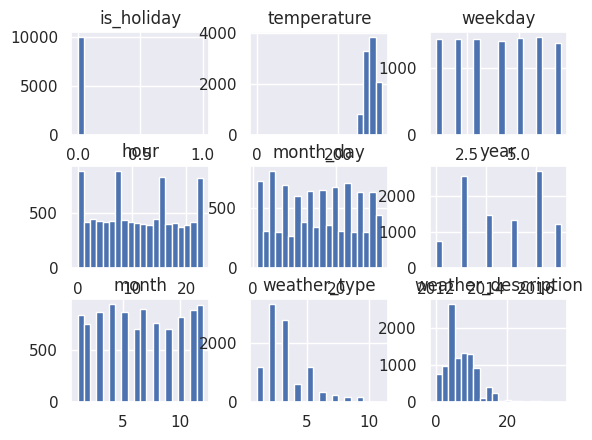

In [31]:
print(data[features].hist(bins=20,))

<Axes: >

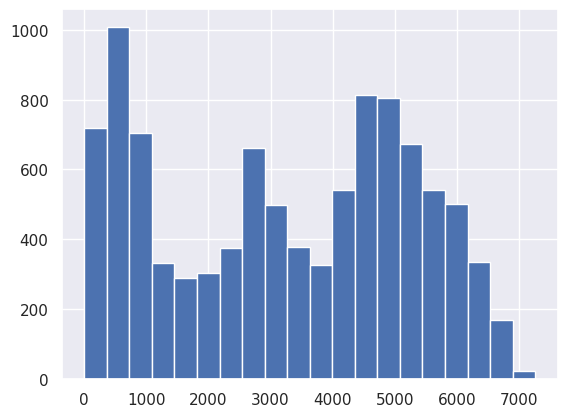

In [32]:
data['traffic_volume'].hist(bins=20)


In [33]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y).flatten()
warnings.filterwarnings('ignore')


In [34]:
print(X[:5])


[[0.         0.94780685 0.16666667 0.04347826 0.16666667 0.4
  0.36363636 0.1        0.28571429]
 [0.         0.88445269 0.16666667 0.34782609 0.7        0.6
  1.         0.4        0.17142857]
 [0.         0.95379409 0.5        0.60869565 0.5        0.6
  0.54545455 0.         0.22857143]
 [0.         0.91136275 0.66666667 0.04347826 0.33333333 0.6
  1.         0.3        0.11428571]
 [0.         0.91738253 0.         0.34782609 0.43333333 0.8
  0.18181818 0.8        0.48571429]]


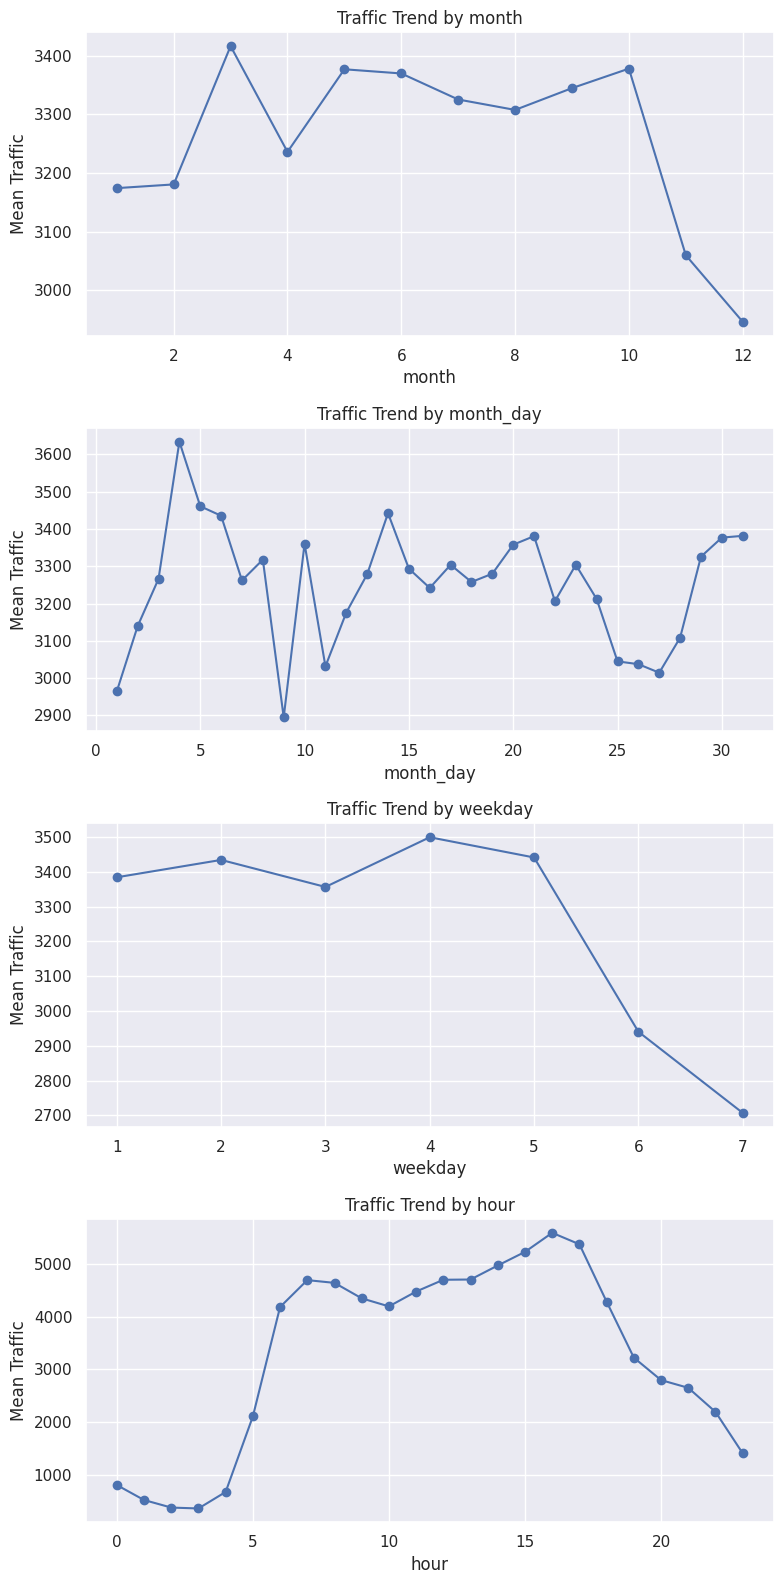

In [35]:

metrics = ['month', 'month_day', 'weekday', 'hour']
fig = plt.figure(figsize=(8, 4*len(metrics)))
for i, metric in enumerate(metrics):
	ax = fig.add_subplot(len(metrics), 1, i+1)
	ax.plot(data.groupby(metric)['traffic_volume'].mean(), '-o')
	ax.set_xlabel(metric)
	ax.set_ylabel("Mean Traffic")
	ax.set_title(f"Traffic Trend by {metric}")
plt.tight_layout()
plt.show()

In [36]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X, y)
new = []
print('predicted output :=',regr.predict(X[:10]))
print('Actual output :=',y[:10])

predicted output := [0.0267632  0.58912036 0.72407618 0.1038799  0.64349375 0.57742917
 0.12529612 0.59626799 0.46130388 0.66151176]
Actual output := [0.05606833 0.71525003 0.73081692 0.04022593 0.82215181 0.55324425
 0.07163521 0.56578041 0.4996556  0.81195757]


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)
y_pred = regr.predict(testX)
print('Mean Absolute Error:', mean_absolute_error(testY, y_pred))

Mean Absolute Error: 0.08609729854644022


In [38]:
print(features)


['is_holiday', 'temperature', 'weekday', 'hour', 'month_day', 'year', 'month', 'weather_type', 'weather_description']


In [39]:
data[features].head(5)


,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,0,291.28,2,1,6,2014,5,2,10
1,0,271.81,2,8,22,2015,12,5,6
2,0,293.12,4,14,16,2015,7,1,8
3,0,280.08,5,1,11,2015,12,4,4
4,0,281.93,1,8,14,2016,3,9,17


In [40]:
ip=[0,270.17,2,21,1,2022,5,3,10]
ip = x_scaler.transform([ip])
out=regr.predict(ip)
print('Before inverse Scaling :',out)

Before inverse Scaling : [0.47472412]


In [41]:

y_pred = y_scaler.inverse_transform([out])
print('Traffic Volume : ',y_pred)

Traffic Volume :  [[3447.02238065]]


In [42]:

if(y_pred<=1000):
  print("No Traffic ")
elif y_pred>1000 and y_pred<=3000:
  print("Busy or Normal Traffic")
elif y_pred>3000 and y_pred<=5500:
  print("heavy Traffic")
else:
  print("Worst case")

heavy Traffic
